# Шаг 6. Гипотезы

Список гипотез, которые мы собираемся проверить:


1.   Влияет ли этаж, на котором расположена квартира, на ее цену? Правда ли, что квартиры на верхних этажах обычно стоят дороже из-за лучшего видового положения.
2.   Может ли общее количество этажей в доме влиять на цену квартиры? Например, квартиры в многоэтажных зданиях могут стоить дешевле из-за большей конкуренции.
3. Возможно ли выявить колебания в ценах на недвижимость, зависящие от дня недели? Например, цены на авиабилеты обычно среди недели дешевле чем в выходные, но есть ли какая-то корреляция между стоимостью жилья и днём недели, когда было опубликовано объявление.





1) Для того, чтобы доказать или опровергнуть первую гипотезу, будем строить диаграмму рассеяния, чтобы выявить взаимосвязи между переменными, а также высчитывать корелляцию между переменной (Этаж/Всего этажей) и Стоимостью аренды.

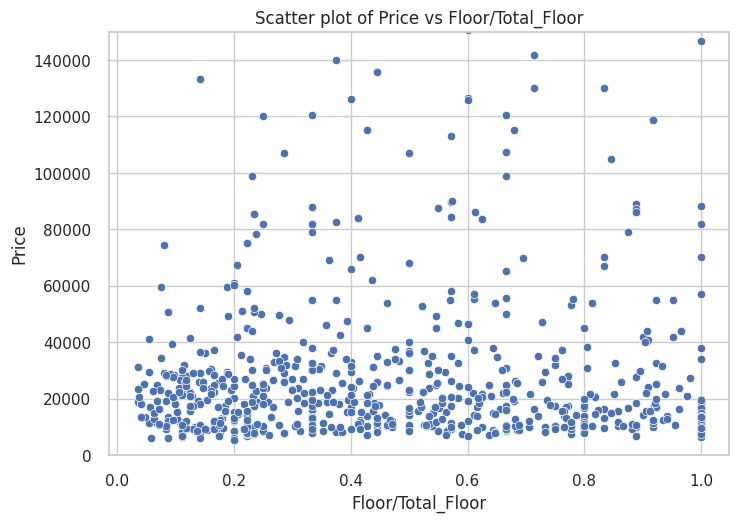

In [82]:
df['Floor_Ratio'] = df['Floor'] / df['Total_Floor']

sns.scatterplot(x='Floor_Ratio', y='Price', data=df)
plt.title('Scatter plot of Price vs Floor/Total_Floor')
plt.xlabel('Floor/Total_Floor')
plt.ylabel('Price')
plt.ylim(0, 150000)
plt.show()

In [71]:
correlation = df['Floor_Ratio'].corr(df['Price'])
print(f"Correlation: {correlation}")

Correlation: 0.25161771418883616


Вывод: чем выше этаж, тем коэффициент по оси Ox должен быть выше, и по нашим предположениям стоимость должна была быть выше, но эту гипотезу мы опровергнули, потому что коэффициент корелляции низок и на диаграмме никакой зависимости не наблюдается.

2) Для доказательства второй гипотезы также построим диаграмму рассеяния и вычислим корелляцию между переменной "Total_Floor" и "Price".

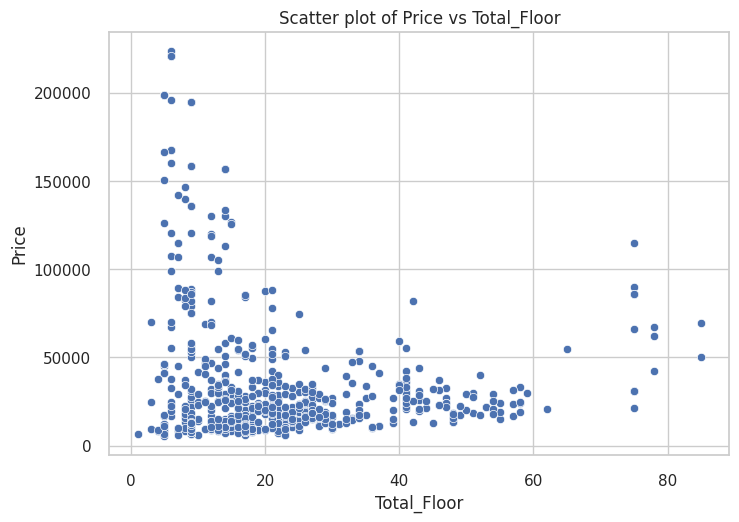

In [72]:
sns.scatterplot(x='Total_Floor', y='Price', data=df)
plt.title('Scatter plot of Price vs Total_Floor')
plt.xlabel('Total_Floor')
plt.ylabel('Price')
plt.show()

In [73]:
correlation = df['Total_Floor'].corr(df['Price'])
print(f"Correlation: {correlation}")

Correlation: -0.5518520449327332


Вывод: значение -0.5518520449327332 указывает на отрицательную корреляцию, существует обратная взаимосвязь между двумя переменными: когда одна переменная увеличивается, другая уменьшается. А также коэффициент указывает на умеренную силу корреляции. То есть мы можем утверждать, что наша гипотеза опровергнута, но в то же время рождается новая зависимость - по нашим данным чем ниже этаж, тем дороже жильё.

3) Для того, чтобы доказать или опровергнуть первую гипотезу, будем строить диаграмму рассеяния, чтобы выявить взаимосвязи между переменными, а также высчитывать корелляцию между переменными День, когда выложили объявление и Стоимостью аренды.

3.1) Изменение типа данный в таблице Date. Сначала добавим словарь с названиями месяцев и их аналогом в числовом представлении. Далее пропишим функцию, которая будет заменять названия месяцев с одного формата на другой.

In [83]:
months = {
    'янв': '01', 'фев': '02', 'мар': '03', 'апр': '04',
    'май': '05', 'июн': '06', 'июл': '07', 'авг': '08',
    'сен': '09', 'окт': '10', 'ноя': '11', 'дек': '12'
}

In [84]:
def replace_month(date_str):
    for rus, num in months.items():
        date_str = date_str.replace(rus, num)
    return date_str

3.2) Преобразование даты в таблице.

In [75]:
df['Date'] = df['Date'].apply(replace_month)
df['Date'] = pd.to_datetime(df['Date'] + ' 2024', format='%d %m %Y')

3.3) Добавление нового столбца с днём недели.

In [81]:
df['Day_of_Week'] = df['Date'].dt.day_name()
df['Day_of_Week_Num'] = df['Date'].dt.dayofweek

In [77]:
display(df.head())

,ID,Date,Price,Metro,Metro_Time,Rooms,Area,Floor,Total_Floor,Floor_Ratio,Day_of_Week,Day_of_Week_Num
0,1,2024-04-12,198460,Площадь Революции,3,2,88.50,2,5,0.400000,Friday,4
2,3,2024-04-12,30790,Площадь Гагарина,9,2,64.07,21,75,0.280000,Friday,4
3,5,2024-04-12,83800,Китай-город,2,2,82.40,5,8,0.625000,Friday,4
4,6,2024-04-12,85974,Маяковская,1,2,62.30,8,9,0.888889,Friday,4
5,8,2024-04-08,135540,Парк Культуры,10,2,75.30,4,9,0.444444,Monday,0


3.4) Построение диаграммы рассеяния.

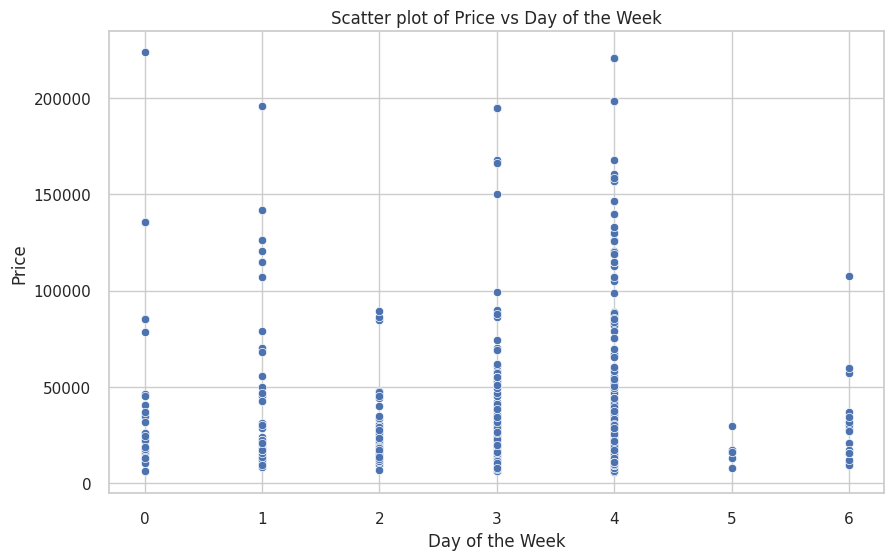

In [78]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Day_of_Week_Num', y='Price', data=df)
plt.xlabel('Day of the Week')
plt.ylabel('Price')
plt.title('Scatter plot of Price vs Day of the Week')

plt.show()

3.5) Вычисление корелляции.

In [79]:
correlation = df['Day_of_Week_Num'].corr(df['Price'])
print(f"Correlation: {correlation}")

Correlation: -0.11160744790204541


3.6) Подсчёт количества выложенных объявлений в каждый день недели.

In [80]:
ad_count_by_day = df['Day_of_Week'].value_counts()
print(ad_count_by_day)

Day_of_Week
Friday       3621
Thursday      652
Monday        516
Wednesday     291
Saturday      254
Tuesday        39
Sunday         17
Name: count, dtype: int64


Вывод: корелляция между переменными крайне мала, на диаграмме тоже особой зависимости не выявлено, гипотеза опровергнута однако крайне интересно, что больше половины объявлений было выложено в Пятницу (то есть в 4 день недели).